In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    readHEPDataCsv,
    fromHB5Table1,
    read_csv_from_web,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `pp>H+tb>tb` [2001.07763](https://arxiv.org/abs/2001.07763)


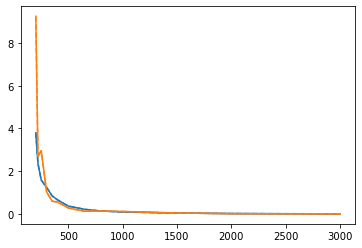

Looks good. Saving this to Hpmtb_LHC13_CMS_36.json


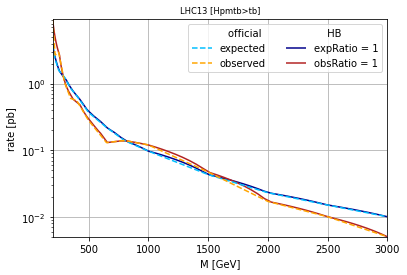

In [2]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1777308/Limit%2013%20TeV%20on%20ass.%20xsec%20x%20BR%20for%20H+/-%20to%20tb%20(0L,1L,2L)/1/csv",
    comment="#",
    skiprows=45,
    names=["m", "exp", "unc+", "unc-"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1777308/Limit%2013%20TeV%20on%20ass.%20xsec%20x%20BR%20for%20H+/-%20to%20tb%20(0L,1L,2L)/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=61 - 24,
    engine="python",
    names=["m", "obs"],
)

assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp
df.m *= 1e3  # TeV to GeV

limitFile = implementChannelLimit(
    "2001.07763",
    {"channels": [["Hpmtb", "tb"]]},
    "https://doi.org/10.17182/hepdata.93014.v1/t1",
    df,
    idSuffix=1,
    massResolution=resolution.tb["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `pp>H+>tb` s-chan [2001.07763](https://arxiv.org/abs/2001.07763)


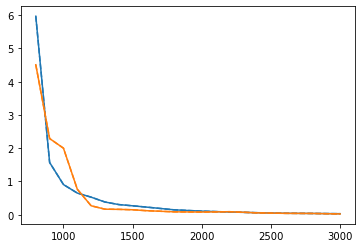

Looks good. Saving this to qqHpm_LHC13_CMS_36.json


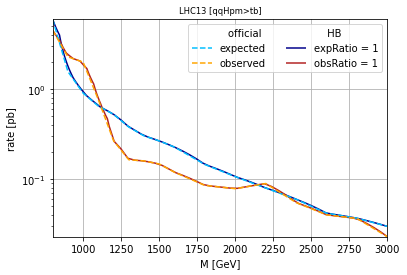

In [3]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1777308/S-channel%20Limit%2013%20TeV%20on%20xsec%20times%20BR%20for%20H+/-%20to%20top-bottom./1/csv",
    comment="#",
    skiprows=49,
    names=["m", "exp", "unc+", "unc-"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1777308/S-channel%20Limit%2013%20TeV%20on%20xsec%20times%20BR%20for%20H+/-%20to%20top-bottom./1/csv",
    comment="#",
    skiprows=9,
    skipfooter=67 - 26,
    engine="python",
    names=["m", "obs"],
)

assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp

limitFile = implementChannelLimit(
    "2001.07763",
    {"channels": [["qqHpm", "tb"]]},
    "https://doi.org/10.17182/hepdata.93014.v1/t2",
    df,
    idSuffix=2,
    massResolution=resolution.tb["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


##  p p -> H+ -> tb leptonic final states [1908.09206](https://arxiv.org/abs/1908.09206)

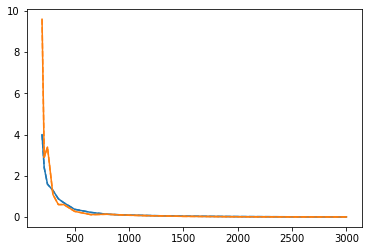

Looks good. Saving this to Hpmtb_lep_LHC13_CMS_36.json


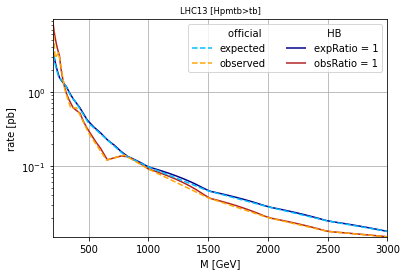

In [2]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1751230/Limit%2013%20TeV/1/csv",
    comment="#",
    skiprows=27,
    skipfooter=61 - 42,
    engine="python",
    names=["m", "exp", "unc+", "unc-"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1751230/Limit%2013%20TeV/1/csv",
    comment="#",
    skiprows=9,
    skipfooter=61 - 24,
    engine="python",
    names=["m", "obs"],
)

assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp

limitFile = implementChannelLimit(
    "1908.09206",
    {"channels": [["Hpmtb", "tb"]]},
    "https://doi.org/10.17182/hepdata.92020.v1/t1",
    df,
    prefix="Hpmtb_lep",
    massResolution=resolution.tb["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
